### Script for reading data for Problem 5.1 (data_AlgaeGrowth.txt) in Applied Statistics 2022 problem set:

This script reads the file __"data_AlgaeGrowth.txt"__ for Problem 5.1 in the problem set of Applied Statistics 2022/23. This data files contains 90 entries in three columns: 
* **time** (hours) of measurement,
* **area** ($\mathrm{cm}^2$) of the algae coverage,
* **area uncertainty** ($\mathrm{cm}^2$).


####  Author: 
- Troels Petersen (Niels Bohr Institute, petersen@nbi.dk)

####  Date:   
 - 1st of December 2022

In [110]:
import pandas as pd
import numpy as np                                     # Matlab like syntax for linear algebra and functions
from numpy.linalg import matrix_power                  # This is to raise matrices to powers
import matplotlib.pyplot as plt                        # Plots and figures like you know them from Matlab
import seaborn as sns                                  # Make the plots nicer to look at
from iminuit import Minuit                             # The actual fitting tool, better than scipy's
import sys                                             # Module to see files and folders in directories
from scipy import stats
import sympy as sp
sys.path.append('../External_Functions')
from statsmodels.sandbox.stats.runs import runstest_1samp
from ExternalFunctions import UnbinnedLH, BinnedLH, Chi2Regression
from ExternalFunctions import nice_string_output, add_text_to_ax    # Useful functions to print fit results on figure

In [105]:
dataframe = pd.read_csv('data_AlgaeGrowth.csv', header=0, index_col=None)
time, area, err_area = dataframe.values.T
dataframe

,0.35,1470.40,45.00
0,0.57,1426.93,45.0
1,0.60,1466.84,45.0
2,0.90,1580.44,45.0
3,1.08,1626.27,45.0
4,1.30,1624.67,45.0
...,...,...,...
84,11.71,1974.83,45.0
85,11.85,2044.98,45.0
86,11.93,2059.38,45.0
87,12.26,2014.04,45.0


Print the first 10 entries to check the content of the file:

In [106]:
for i in range(10):
    print(f"  time = {time[i]:4.2f} hrs    area = {area[i]:6.2f} cm2    err_area = {err_area[i]:5.2f} cm2")

  time = 0.57 hrs    area = 1426.93 cm2    err_area = 45.00 cm2
  time = 0.60 hrs    area = 1466.84 cm2    err_area = 45.00 cm2
  time = 0.90 hrs    area = 1580.44 cm2    err_area = 45.00 cm2
  time = 1.08 hrs    area = 1626.27 cm2    err_area = 45.00 cm2
  time = 1.30 hrs    area = 1624.67 cm2    err_area = 45.00 cm2
  time = 1.51 hrs    area = 1559.46 cm2    err_area = 45.00 cm2
  time = 1.64 hrs    area = 1577.22 cm2    err_area = 45.00 cm2
  time = 1.86 hrs    area = 1626.99 cm2    err_area = 45.00 cm2
  time = 2.03 hrs    area = 1710.10 cm2    err_area = 45.00 cm2
  time = 2.42 hrs    area = 1606.80 cm2    err_area = 45.00 cm2


Text(0, 0.5, 'area [cm2]')

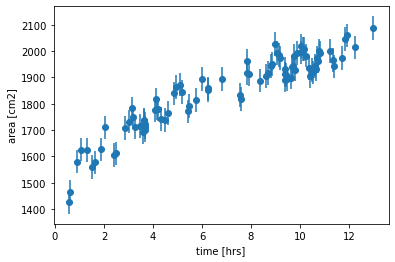

In [107]:
spacay = np.linspace(0, 14, 10000)

#plot the data
plt.errorbar(time, area, yerr=err_area, fmt='o', label='data')
plt.xlabel('time [hrs]')
plt.ylabel('area [cm2]')

In [108]:
#fit a third order polynomial
def f(x, a, b, c, d):
    return a + b*x + c*x**2 + d*x**3

#fit the data
chi2 = Chi2Regression(f, time, area, err_area)
minuit = Minuit(chi2, a=0, b=1, c=0, d=0)
minuit.migrad()
print(minuit.values)

<ValueView a=1433.82514176143 b=119.06237197970243 c=-10.799400116990332 d=0.4109486435098808>


chi2 = 71.63


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


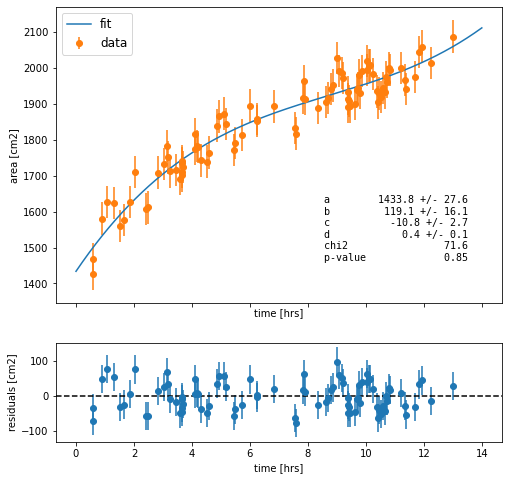

In [139]:
fig, ax = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})

ax[0].plot(spacay, f(spacay, *minuit.values), label='fit')
ax[0].errorbar(time, area, yerr=err_area, fmt='o', label='data')
ax[0].set_xlabel('time [hrs]')
ax[0].set_ylabel('area [cm2]')

#Make a runs test of the residuals
res = area - f(time, *minuit.values)



#standard deviation of the residuals
std = np.std(res)

#dashed line at zero
ax[1].axhline(0, color='k', linestyle='--')

#make lower plot of the residuals
ax[1].errorbar(time, res,yerr=std, fmt='o', label='residuals')
ax[1].set_xlabel('time [hrs]')
ax[1].set_ylabel('residuals [cm2]')




#chi2 test
Ndof = len(time) - 4
chi2 = minuit.fval
print(f"chi2 = {chi2:.2f}")
chi2test = stats.chi2.sf(chi2, Ndof)
#Crazy Daisy goodness of fit test

d = {'a': [minuit.values['a'], minuit.errors['a']], 
        'b': [minuit.values['b'], minuit.errors['b']],
        'c': [minuit.values['c'], minuit.errors['c']],
        'd': [minuit.values['d'], minuit.errors['d']],
        'chi2': f"{chi2:.1f}",
        'p-value': f"{chi2test:.2f}"}

text = nice_string_output(d, extra_spacing=2, decimals=1)
add_text_to_ax(0.6, 2.5, text, ax=plt.gca(), fontsize=10)



ax[0].legend(loc='upper left', fontsize=12)

fig.savefig('init_algae_fit.eps',bbox_inches='tight')

In [ ]:
#chi2 test
Ndof = len(time) - 4
chi2 = minuit.fval
print(f"chi2 = {chi2:.2f}")
stats.chi2.sf(chi2, Ndof)
#Crazy Daisy goodness of fit test


chi2 = 71.63


0.849155028152911

In [145]:




print(f"std = {std:.2f}")

init_runs = runstest_1samp(res,0,False)

# Absolutely not randomly distributed around the fit
print(f"p-value = {init_runs[1]:.4f}")


std = 40.37
p-value = 0.0002


In [ ]:
#New fit with added oscillating term
def fosc(x, a, b, c, d, e, f):
    return a + b*x + c*x**2 + d*x**3 + e*np.sin(f*x)

#fit the data
chi2_osc = Chi2Regression(fosc, time, area, err_area)
minuit_osc = Minuit(chi2_osc, a=0, b=1, c=0, d=0, e=40, f=6.5)
minuit_osc.migrad()
print(minuit_osc.values)


<ValueView a=1457.7557290783095 b=104.02583742821187 c=-8.18638137803004 d=0.28008867817894695 e=45.05114544259087 f=6.447072981412243>


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


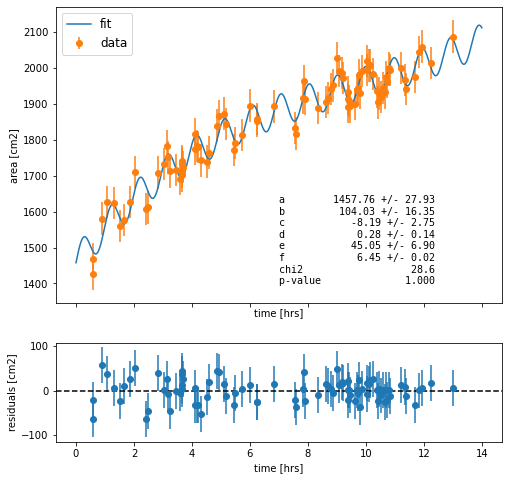

In [152]:
fig1, ax1 = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax1[0].plot(spacay, fosc(spacay, *minuit_osc.values), label='fit')
ax1[0].errorbar(time, area, yerr=err_area, fmt='o', label='data')
ax1[0].set_xlabel('time [hrs]')
ax1[0].set_ylabel('area [cm2]')
ax1[0].legend(loc='upper left', fontsize=12)

#Horizontal line at zero
ax1[1].axhline(0, color='k', linestyle='--')

#Plot the residuals
res_osc = area - fosc(time, *minuit_osc.values)
ax1[1].errorbar(time, res_osc, yerr=std, fmt='o', label='residuals')
ax1[1].set_xlabel('time [hrs]')
ax1[1].set_ylabel('residuals [cm2]')

#chi2 test
Ndof = len(time) - 6
chi2_osc = minuit_osc.fval
chi2_osc_test = stats.chi2.sf(chi2_osc, Ndof)

d = {'a': [minuit_osc.values['a'], minuit_osc.errors['a']],
        'b': [minuit_osc.values['b'], minuit_osc.errors['b']],
        'c': [minuit_osc.values['c'], minuit_osc.errors['c']],
        'd': [minuit_osc.values['d'], minuit_osc.errors['d']],
        'e': [minuit_osc.values['e'], minuit_osc.errors['e']],
        'f': [minuit_osc.values['f'], minuit_osc.errors['f']],
        'chi2': f"{chi2_osc:.1f}",
        'p-value': f"{chi2_osc_test:.3f}"}
        
text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 2.5, text, ax=plt.gca(), fontsize=10)

fig1.savefig('algae_fit_osc.eps',bbox_inches='tight')


In [148]:
#chi2 test
Ndof_osc = len(time) - 6
chi2_osc = minuit_osc.fval
print(f"chi2_osc = {chi2_osc:.2f}")
stats.chi2.sf(chi2_osc, Ndof_osc)


res_osc = area - fosc(time, *minuit_osc.values)

std_osc = np.std(res_osc)
print(f"std_osc = {std_osc:.2f}")

runstest = runstest_1samp(res_osc,0,False)


chi2_osc = 28.58
std_osc = 25.50


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


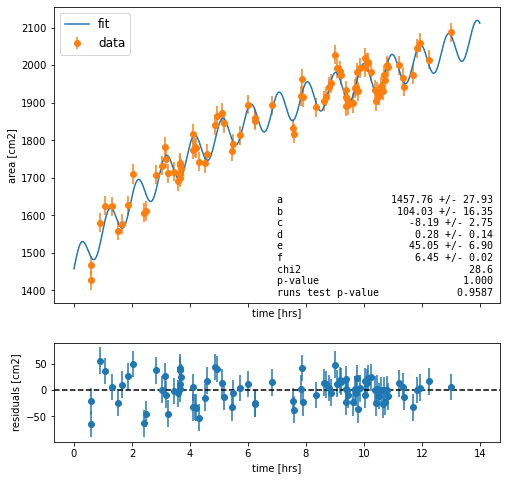

In [154]:
#Make the same plot as before but with updated uncertainties
fig2, ax2 = plt.subplots(2, 1, figsize=(8, 8), sharex=True, gridspec_kw={'height_ratios': [3, 1]})
ax2[0].plot(spacay, fosc(spacay, *minuit_osc.values), label='fit')
ax2[0].errorbar(time, area, yerr=std_osc, fmt='o', label='data')
ax2[0].set_xlabel('time [hrs]')
ax2[0].set_ylabel('area [cm2]')
ax2[0].legend(loc='upper left', fontsize=12)

#Horizontal line at zero
ax2[1].axhline(0, color='k', linestyle='--')

#Plot the residuals
res_osc = area - fosc(time, *minuit_osc.values)
ax2[1].errorbar(time, res_osc, yerr=std_osc, fmt='o', label='residuals')
ax2[1].set_xlabel('time [hrs]')
ax2[1].set_ylabel('residuals [cm2]')
fig2.savefig('algae_fit_osc_unc.eps',bbox_inches='tight')

#chi2 test
chi2_update = minuit_osc.fval
chi2_update_test = stats.chi2.sf(chi2_update, Ndof_osc)

d={'a': [minuit_osc.values['a'], minuit_osc.errors['a']],
        'b': [minuit_osc.values['b'], minuit_osc.errors['b']],
        'c': [minuit_osc.values['c'], minuit_osc.errors['c']],
        'd': [minuit_osc.values['d'], minuit_osc.errors['d']],
        'e': [minuit_osc.values['e'], minuit_osc.errors['e']],
        'f': [minuit_osc.values['f'], minuit_osc.errors['f']],
        'chi2': f"{chi2_update:.1f}", 
        'p-value': f"{chi2_update_test:.3f}",
        'runs test p-value': f'{runstest[1]:.4f}'}

text = nice_string_output(d, extra_spacing=2, decimals=2)
add_text_to_ax(0.5, 2.5, text, ax=plt.gca(), fontsize=10)

fig2.savefig('algae_fit_osc_upd.eps',bbox_inches='tight')